#Algoritmos de clasificación
**Joel Isaias Solano Ocampo | A01639289**


---

En canvas podrás encontrar la base de datos "iris-data". Borra la variable "Id" de la base de datos, ya que esta no contiene información relevante. Explica los algoritmos que utilizan los métodos de clasificación: regresión logística, Bayes y análisis de discriminate. De ser el caso muestra las ecuaciones correspondientes.

Utiliza los algoritmos de clasificación antes mencionados para predecir el tipo de planta.  Utiliza todas las variables de la base de datos como variables regresoras. Muestra la exactitud de cada modelo y su correspondiente matriz de confusión.


---



1. Importamos librerias necesarias:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pandas._libs.tslibs.np_datetime import compare_mismatched_resolutions

2. Obtenemos la base de datos mediante url y modificamos nombres de las columnas:

In [ ]:
bd = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
nom_col = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
df = pd.read_csv(bd, names=nom_col)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


3. Preprocesamos los datos de longitud y ancho de sepal y petal:

In [ ]:
x = df.iloc[:, :-1].values
print(x[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


4. Preprocesamos los datos de las especies:

In [ ]:
y = df.iloc[:, 4].values
print(y[:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


5. Se dividen los datos preprocesados en listas de entrenamiento y pruebas:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print(x_train[:5])

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]


6. Realizamos el Modelo de Regresion logistica:

Presicion del modelo:  1.0


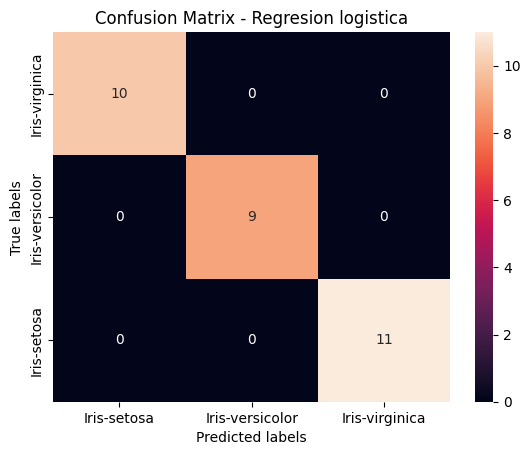

In [ ]:
# Modelo Regresión logística
rl = LogisticRegression(random_state=0)
rl.fit(x_train, y_train)
y_pred_rl = rl.predict(x_test)
cm_rl = confusion_matrix(y_test, y_pred_rl)
as_rl = accuracy_score(y_test, y_pred_rl)

# Presicion y graficacion del modelo
print("Presicion del modelo: ", as_rl)
ax = plt.subplot()
sns.heatmap(cm_rl, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Regresion logistica');
ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']);

7. Realizamos el Modelo de Bayes:

Presicion del modelo:  1.0


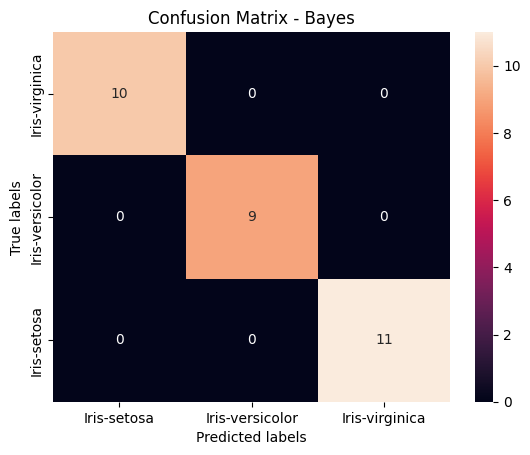

In [ ]:
# Modelo Bayes
bayes = GaussianNB()
bayes.fit(x_train, y_train)
y_pred_bayes = bayes.predict(x_test)
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
as_bayes = accuracy_score(y_test, y_pred_bayes)

# Presicion y graficacion del modelo
print("Presicion del modelo: ", as_bayes)
ax = plt.subplot()
sns.heatmap(cm_bayes, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Bayes');
ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']);

8. Realizamos el Modelo de Analisis de discriminante:

Presicion del modelo:  1.0


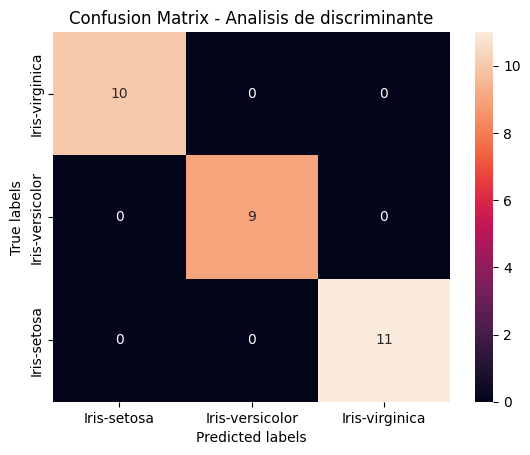

In [ ]:
# Modelo de Análisis de discriminante
ad = LinearDiscriminantAnalysis()
ad.fit(x_train, y_train)
y_pred_ad = ad.predict(x_test)
cm_ad = confusion_matrix(y_test, y_pred_ad)
as_ad = accuracy_score(y_test, y_pred_ad)

# Presicion y graficacion del modelo
print("Presicion del modelo: ", as_ad)
ax = plt.subplot()
sns.heatmap(cm_ad, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Analisis de discriminante');
ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']);



---


#####**¿Qué modelo fue el méjor? ¿Por qué crees que se suceda esto?**
Ningun modelo fue mejor, es decir, todos se comportaron de la misma manera a pesar de usar metodos distintos. La razon por la que su nivel de exactitud fue la misma es porque los datos que se manejan para los 3 modelos se pueden separar de forma lineal y tanto regresion lineal, Bayes y discriminante pueden separar dichos datos con la misma precision, por ende, la misma exaactitud y matriz de confusion. Por caso contrario, si no fueran linealmente separables, ahi si podriamos ver diferentes valores de presicion y tendriamos que recurrir a otros tipos de metodos de clasificacion.